<a href="https://colab.research.google.com/github/edaerer/tensorflow-object-detection/blob/main/plane_detection_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from ai_edge_litert.interpreter import Interpreter

model_path = 'models/lite0-detection-default.tflite'

interpreter = Interpreter(model_path)

interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input:", input_details)
print("Outputs:", output_details)

Input: [{'name': 'serving_default_images:0', 'index': 0, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0078125, 127), 'quantization_parameters': {'scales': array([0.0078125], dtype=float32), 'zero_points': array([127], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Outputs: [{'name': 'StatefulPartitionedCall:3', 'index': 598, 'shape': array([ 1, 25,  4], dtype=int32), 'shape_signature': array([ 1, 25,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:2', 'index': 599, 'shape': array([ 1, 25], dtype=int32), 'shape_signature': array([ 1, 25], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_param

In [5]:
import numpy as np
from PIL import Image

# Load and resize
img_path = "images/image_0"
img = Image.open(img_path).convert("RGB")
input_height = input_details[0]['shape'][1]
input_width = input_details[0]['shape'][2]
img_resized = img.resize((input_width, input_height))

# Convert to numpy and match dtype
input_data = np.expand_dims(img_resized, axis=0).astype(input_details[0]['dtype'])

# If float model, normalize to [0,1]
if input_details[0]['dtype'] == np.float32:
    input_data = input_data / 255.0

In [6]:
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

boxes = interpreter.get_tensor(output_details[0]['index'])[0]
classes = interpreter.get_tensor(output_details[1]['index'])[0].astype(int)
scores = interpreter.get_tensor(output_details[2]['index'])[0]
num_detections = int(interpreter.get_tensor(output_details[3]['index'])[0])

coco_labels = [
    'person','bicycle','car','motorcycle','airplane','bus','train','truck','boat','traffic light',
    'fire hydrant','stop sign','parking meter','bench','bird','cat','dog','horse','sheep','cow',
    'elephant','bear','zebra','giraffe','backpack','umbrella','handbag','tie','suitcase','frisbee',
    'skis','snowboard','sports ball','kite','baseball bat','baseball glove','skateboard','surfboard',
    'tennis racket','bottle','wine glass','cup','fork','knife','spoon','bowl','banana','apple',
    'sandwich','orange','broccoli','carrot','hot dog','pizza','donut','cake','chair','couch',
    'potted plant','bed','dining table','toilet','tv','laptop','mouse','remote','keyboard','cell phone',
    'microwave','oven','toaster','sink','refrigerator','book','clock','vase','scissors','teddy bear',
    'hair drier','toothbrush'
]

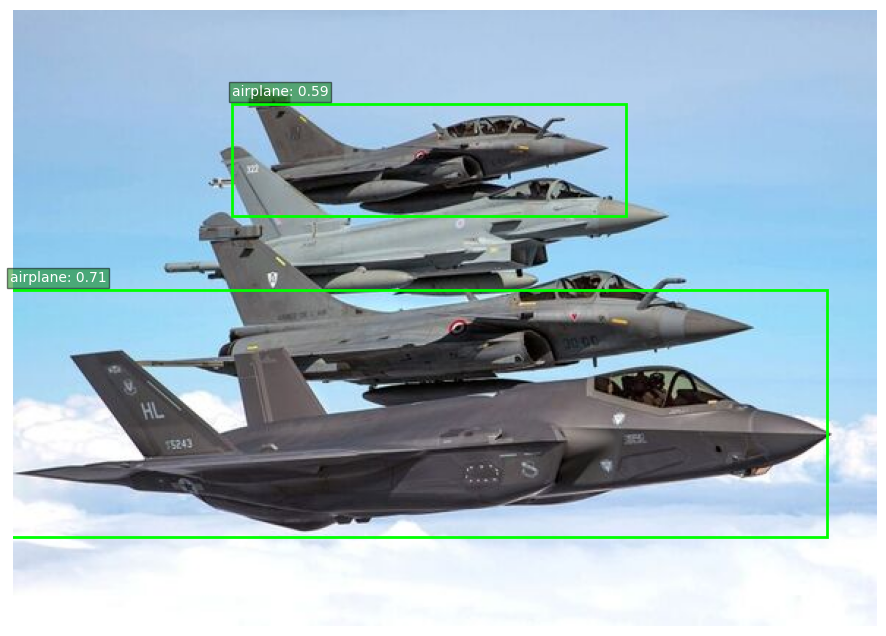

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(img)
img_w, img_h = img.size

for i in range(num_detections):
    if scores[i] < 0.5:
        continue
    ymin, xmin, ymax, xmax = boxes[i]
    (left, right, top, bottom) = (xmin * img_w, xmax * img_w, ymin * img_h, ymax * img_h)

    rect = patches.Rectangle((left, top), right - left, bottom - top,
                             linewidth=2, edgecolor='lime', facecolor='none')
    ax.add_patch(rect)

    class_name = coco_labels[classes[i]] if classes[i] < len(coco_labels) else f"ID {classes[i]}"
    ax.text(left, top - 5, f"{class_name}: {scores[i]:.2f}",
            fontsize=10, color='white',
            bbox=dict(facecolor='green', alpha=0.5, pad=2))

plt.axis('off')
plt.show()

# Task
Convert a TFLite model to ONNX format by first converting it to a TensorFlow SavedModel.

## Load and convert tflite to savedmodel


In [29]:
import tensorflow as tf
import numpy as np

tflite_model_path = "models/lite0-detection-default.tflite"

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_images:0', 'index': 0, 'shape': array([  1, 320, 320,   3], dtype=int32), 'shape_signature': array([  1, 320, 320,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.0078125, 127), 'quantization_parameters': {'scales': array([0.0078125], dtype=float32), 'zero_points': array([127], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:3', 'index': 598, 'shape': array([ 1, 25,  4], dtype=int32), 'shape_signature': array([ 1, 25,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:2', 'index': 599, 'shape': array([ 1, 25], dtype=int32), 'shape_signature': array([ 1, 25], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'qua

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [38]:
class TFLiteWrapper(tf.Module):
    def __init__(self, interpreter):
        super().__init__()
        self.interpreter = interpreter
        self.input_index = interpreter.get_input_details()[0]['index']
        self.output_index = interpreter.get_output_details()[0]['index']

    def __call__(self, x):
        # Ensure NumPy array
        if isinstance(x, tf.Tensor):
            x = x.numpy()
        self.interpreter.set_tensor(self.input_index, x)
        self.interpreter.invoke()
        output = self.interpreter.get_tensor(self.output_index)
        return {"output": tf.convert_to_tensor(output)}

# Create wrapper instance
model = TFLiteWrapper(interpreter)

In [40]:
saved_model_dir = "./saved_model"
tf.saved_model.save(model, saved_model_dir)

In [41]:
%ls

images/  models/  sample_data/  saved_model/
